🎯 Accuracy: 0.8268156424581006

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



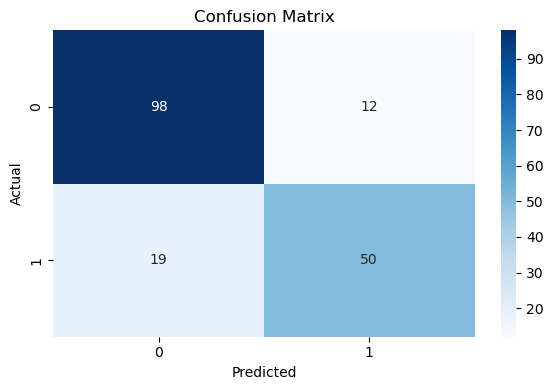

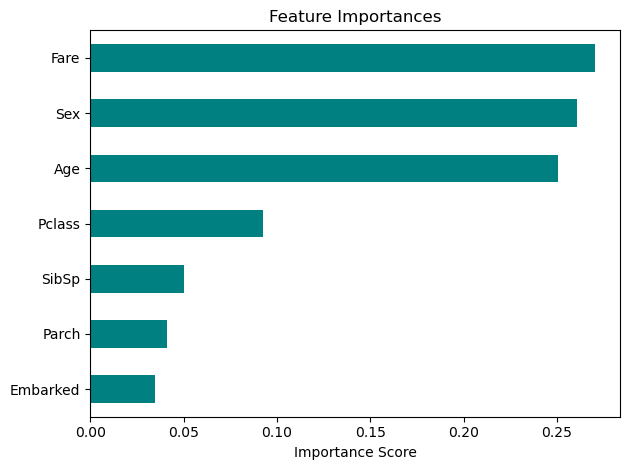

In [3]:
# titanic_ml_pipeline.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 2. Handle missing values (FIXED VERSION - no inplace)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 3. Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])           # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked']) # S=2, C=0, Q=1

# 4. Drop irrelevant columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# 5. Split into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate model
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 11. Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
